<a href="https://colab.research.google.com/github/Taykehrle/github-slideshow/blob/master/PROJETO_DARK_KITCHEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/rafael-arevalo/orbeai/master/Logo-Orbe-sem-fundo.png" height="300px"></center>

# **PROJETO MÓDULO 04 - Dark Kitchen**



## **01.COMPREENSÃO DO NEGÓCIO.**

Os problemas de negócios que devem ser resolvidos neste projeto são:

- **01.PORTIFÓLIO.**
  - Identificar os três produtos (pratos) que possuem maior faturamento.

- **02.LOCAL.**

  - Levando em consideração os três produtos do item anterior, identificar o lugar (latitude e longitude) que tenha maior faturamento para que possa ser criada uma *dark kitchen*.

## **02.IMPORTAR OS DADOS E CRIAR O DataFrame.**

### **02.a.Importar bibliotecas necessárias.**

Importe as bibliotecas necessárias para realizar as seguntes tarefas:

- 01.Trabalhar com dados.
- 02.Criar gráficos.
- 03.Criar mapas espaciais.
- 04.Gerar mapas de calor.

In [2]:
# Importando as bibliotecas necessárias para o projeto.
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins

In [ ]:
#@title Clique aqui para ver a resposta.

# 01.Trabalhar com dados.
import pandas as pd

# 02.Criar gráficos.
import matplotlib.pyplot as plt

# 03.Criar mapas espaciais.
import folium

# 04.Gerar mapas de calor.
from folium import plugins

### **02.b.Importar o *dataset* e criar o *DataFrame*.**

Use o *dataset* para criar um *DataFrame* chamado **`df_pedidos`**.

In [3]:
# Criando um DataFrame.
df_pedidos = pd.read_excel("/content/dataset_pedidos_delivery_PROJETO.xlsx")

In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos = pd.read_excel('/content/dataset_pedidos_delivery_PROJETO - V04.xlsx')

Visualize as cinco primeiras entradas do *DataFrame*.

In [4]:
# Visualizando as cinco primeiras entradas do DataFrame
df_pedidos.head(5)

,DIA,MES,ANO,HORA,PRATO_PEDIDO,QUANTIDADE_DE_ITENS,TOTAL_DA_COMPRA,LATITUDE,LONGITUDE,CIDADE,FORMA_DE_PAGAMENTO
0,13,6,2020,11,RISOTO_FRANGO,1,32.0,-23.519016,-47.439082,Sorocaba,Credito
1,13,6,2020,13,PARMEGIANA_MIGNON,2,72.0,-23.489067,-47.474325,Sorocaba,Credito
2,13,6,2020,11,PARMEGIANA_FRANGO,2,69.0,-23.479150,-47.416110,Sorocaba,Credito
3,14,6,2020,11,RISOTO_FRANGO,1,36.0,-23.479150,-47.416110,Sorocaba,Credito
4,14,6,2020,12,RISOTO_QUEIJO,1,84.0,-23.491949,-47.415816,Sorocaba,Credito


In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos.head()

Verifique o formato do *DataFrame*.

In [5]:
# Verificando o formato do DataFrame
df_pedidos.shape

(3711, 11)

In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos.shape

## **03.COMPREENDER OS DADOS.**

### **03.a.Atributos.**

#### **03.a.I.Tipos de dados.**

Visualize o tipo de dado que cada atributo (coluna) do *DataFrame* possui.

In [7]:
# Visualizando o tipo de dado que cada atributo possui.
df_pedidos.dtypes

DIA                      int64
MES                      int64
ANO                      int64
HORA                     int64
PRATO_PEDIDO            object
QUANTIDADE_DE_ITENS      int64
TOTAL_DA_COMPRA        float64
LATITUDE               float64
LONGITUDE              float64
CIDADE                  object
FORMA_DE_PAGAMENTO      object
dtype: object

In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos.dtypes

#### **03.a.II.Dados ausentes.**

Calcule a soma de dados ausentes por atributo do *DataFrame*.

In [8]:
# Calculando a soma de dados ausentes para cada atributo.
df_pedidos.isnull().sum()

DIA                    0
MES                    0
ANO                    0
HORA                   0
PRATO_PEDIDO           0
QUANTIDADE_DE_ITENS    0
TOTAL_DA_COMPRA        0
LATITUDE               0
LONGITUDE              0
CIDADE                 0
FORMA_DE_PAGAMENTO     0
dtype: int64

In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos.isnull().sum()

### **03.b.Estatística.**

#### **03.b.I.Variáveis numéricas.**

 - Use a biblioteca Pandas para plotar um gráfico de histograma para todas as variáveis numéricas.

  - Use o parâmentro **`figsize( )`** para deixar o grafico com largura 20 e altura 10.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0211b5090>,
      dtype=object)

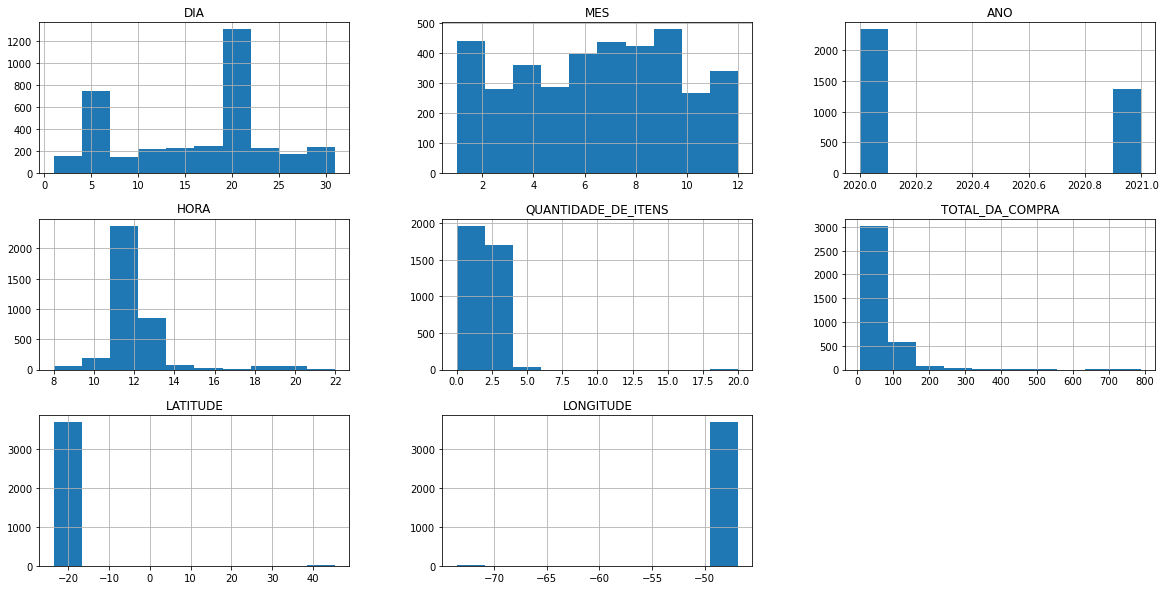

In [9]:
# Plotando um histograma com a biblioteca Pandas.
df_pedidos.hist(figsize=(20,10))

In [ ]:
#@title Clique aqui para ver a resposta.
df_pedidos.hist(figsize=(20,10));

#### **03.b.II.Variáveis categóricas.**

- 01.Use a biblioteca Matplotlib para construir um gráfico de barras para visualizar a quantidade de vendas de cada prato da coluna **PRATO_PEDIDO**.

- 02.Customize o gráfico com os seguintes itens:
 - **Título:** Nome dos pratos.
 - **Legenda eixo Y:** Quantidade de pratos vendida.


Text(0, 0.5, 'Quantidade de pratos vendida')

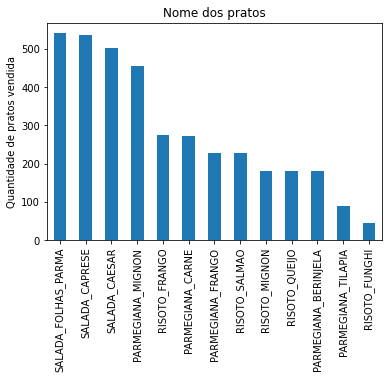

In [12]:
# Construindo um gráfico de barras para os pratos da coluna PRATO_PEDIDO.
fig, ax_01 = plt.subplots()
df_pedidos.PRATO_PEDIDO.value_counts().plot(kind="bar", ax=ax_01)
ax_01.set_title("Nome dos pratos")
ax_01.set_ylabel("Quantidade de pratos vendida")


In [ ]:
#@title Clique aqui para ver a resposta.

# 01.Criando os objetos figure e axes.
fig, ax_01 = plt.subplots()

# 02.Plotando o gráfico e o armazenando no axes criado.
df_pedidos.PRATO_PEDIDO.value_counts().plot(kind='bar', ax=ax_01)

# 03.Customizando o gráfico.
# 03.a.Título.
ax_01.set_title("Nome dos pratos")

# 03.b.Legenda eixo Y.
ax_01.set_ylabel('Quantidade de pratos vendida')


## **04.RESPONDENDO OS PROBLEMAS DE NEGÓCIO.**

### **04.a.Entender os pratos que mais faturam.**

- Use o método **`groupby( )`** para agregar as colunas TOTAL_DA_COMPRA e PRATO_PEDIDO e armazene em um objeto chamado **pratos_mais_faturam**.

In [13]:
# Agragando as colunas TOTAL_DA_COMPRA e PRATO_PEDIDO no objeto pratos_mais_faturam
df_pratos_mais_faturam = df_pedidos.TOTAL_DA_COMPRA.groupby([df_pedidos.PRATO_PEDIDO])

In [ ]:
#@title Clique aqui para ver a reposta.

pratos_mais_faturam = df_pedidos['TOTAL_DA_COMPRA'].groupby(df_pedidos['PRATO_PEDIDO'])

- Use o objeto **`pratos_mais_faturam`** criado anteriormente para descobrir quais são os três pratos que mais faturam.
 - **Dica:** junto com a sua resposta, use o método **`sort_values(ascending=False)`** para ordenar a resposta do prato que mais fatura para aquele que menos fatura.

In [14]:
# Descobrindo quais são os três pratos que mais faturam.
df_pratos_mais_faturam.sum().sort_values(ascending=False)

PRATO_PEDIDO
SALADA_CAPRESE          40125.00
SALADA_CAESAR           40080.00
SALADA_FOLHAS_PARMA     35165.00
PARMEGIANA_MIGNON       34740.99
RISOTO_FRANGO           21249.00
PARMEGIANA_CARNE        21153.49
PARMEGIANA_FRANGO       19377.50
RISOTO_SALMAO           17856.00
RISOTO_MIGNON           14671.50
RISOTO_QUEIJO           14439.50
PARMEGIANA_BERINJELA    14184.50
PARMEGIANA_TILAPIA       7271.50
RISOTO_FUNGHI            3456.50
Name: TOTAL_DA_COMPRA, dtype: float64

In [ ]:
#@title Clique aqui para ver a resposta.
pratos_mais_faturam.sum().sort_values(ascending=False)

### **04.b.Preparando os dados.**

- 01.Crie um *DataFrame* chamado **df_maiores_vendas** que contenha somente os três pratos que mais faturam.
 - **observação:** use o *DataFrame* **`df_pedidos`** para criar o *DataFrame* **`df_maiores_vendas`**.
 

In [15]:
# 01.Criando o DataFrame df_maiores_vendas.
df_maiores_vendas = df_pedidos[(df_pedidos["PRATO_PEDIDO"]== "SALADA_CAPRESE") |
                               (df_pedidos["PRATO_PEDIDO"] == "SALADA_CAESAR") |
                               (df_pedidos["PRATO_PEDIDO"] == "SALADA_FOLHAS_PARMA")]

In [ ]:
#@title Clique aqui para ver a resposta.
df_maiores_vendas = df_pedidos[(df_pedidos['PRATO_PEDIDO'] == 'SALADA_CAPRESE') |
                               (df_pedidos['PRATO_PEDIDO'] == 'SALADA_CAESAR') |
                               (df_pedidos['PRATO_PEDIDO'] == 'SALADA_FOLHAS_PARMA')]

- 02.Use o método **`head()`** para visualizar as cinco primeiras entradas do *DataFrame*.



In [16]:
# 02.Visualizando as cinco primeiras entradas do DataFrame.
df_maiores_vendas.head(5)

,DIA,MES,ANO,HORA,PRATO_PEDIDO,QUANTIDADE_DE_ITENS,TOTAL_DA_COMPRA,LATITUDE,LONGITUDE,CIDADE,FORMA_DE_PAGAMENTO
2134,5,6,2020,11,SALADA_FOLHAS_PARMA,1,65.0,-23.445342,-47.456180,Sorocaba,Credito
2135,20,6,2020,12,SALADA_CAESAR,2,80.0,-23.499507,-47.430428,Sorocaba,Credito
2136,21,6,2020,13,SALADA_CAPRESE,2,75.0,-23.499507,-47.430428,Sorocaba,Credito
2137,5,6,2020,11,SALADA_FOLHAS_PARMA,1,65.0,-23.494847,-47.428832,Sorocaba,Credito
2138,20,6,2020,12,SALADA_CAESAR,2,80.0,-23.495833,-47.429457,Sorocaba,Credito


In [ ]:
#@title Clique aqui para ver a resposta.
df_maiores_vendas.head()

- 03.Use a propriedade **`shape`** para entender o formato do *DataFrame*.



In [17]:
# 03.Entendendo o formato do DataFrame.
df_maiores_vendas.shape

(1577, 11)

In [ ]:
#@title Clique aqui para ver a resposta.
df_maiores_vendas.shape

- 04.Verifique a quantidade vendida de cada um dos pratos da coluna PRATO_PEDIDO.

In [18]:
# 04.Verificando a quantidade de vendas para cada prato.
df_maiores_vendas.PRATO_PEDIDO.value_counts()

SALADA_FOLHAS_PARMA    541
SALADA_CAPRESE         535
SALADA_CAESAR          501
Name: PRATO_PEDIDO, dtype: int64

In [ ]:
#@title Clique aqui para ver a resposta.
df_maiores_vendas.PRATO_PEDIDO.value_counts()

### **04.c.Descobrindo qual a melhor localização para criar uma *dark kitchen*.**

- Use o método **`groupby( )`** para agregar/reunir a coluna **TOTAL_DA_COMPRA** com as colunas **LATITUDE** e **LONGITUDE** e as armazene em um objeto chamado **local_maior_faturamento**.



In [20]:
# Agragando as colunas TOTAL_PEDIDO com as colunas LATITUDE e LONGITUDE.
local_maior_faturamento = df_maiores_vendas.TOTAL_DA_COMPRA.groupby([df_maiores_vendas.LATITUDE, df_maiores_vendas.LONGITUDE])

In [ ]:
#@title Clique aqui para ver a resposta.
local_maior_faturamento = df_maiores_vendas['TOTAL_DA_COMPRA'].groupby([df_maiores_vendas['LATITUDE'], df_maiores_vendas['LONGITUDE']])

- Use o objeto **local_maior_faturamento** criado anteriormente para descobrir qual é a **LATITUDE** e a **LONGITUDE** onde há a maior soma de vendas.
 - **Dica:** para visualizar de forma mais fácil a **LATITUDE** e a **LONGITUDE** onde há maior soma de vendas, use o método **`sort_values(ascending=False)`**.

In [21]:
# Calculando a LATITUDE e a LONGITUDE que tenha a maior soma de vendas.
local_maior_faturamento.sum().sort_values(ascending=False)

LATITUDE    LONGITUDE 
-23.495833  -47.429457    7210.0
-23.490770  -47.430195    3875.0
-23.499507  -47.430428    3630.0
-23.483928  -47.458999    3545.0
-23.491949  -47.415816    3380.0
                           ...  
-23.492314  -47.412316      65.0
-23.529321  -47.471107      65.0
-23.491773  -47.439388      65.0
-23.490293  -47.410811      65.0
-23.527534  -47.466620      65.0
Name: TOTAL_DA_COMPRA, Length: 291, dtype: float64

In [ ]:
#@title Clique aqui para ver a resposta.
local_maior_faturamento.sum().sort_values(ascending=False)

### **04.d.Criando um mapa.**

- **01.Use a biblioteca Folium para criar um mapa.**
 - **observação:** este mapa deve começar com os seguintes parêmetros:
   - location=[-23.5028441,-47.4335729]
   -  zoom_start=12

In [23]:
# Criando um mapa com a biblioteca Folium
mapa = folium.Map(location=[-23.5028441,-47.4335729], zoom_start=12)

In [ ]:
#@title Clique aqui para ver a resposta.
mapa = folium.Map(location=[-23.5028441,-47.4335729], zoom_start=12)

- **02.Visualize o mapa criado.**

In [24]:
# Visualizando o mapa criado.
mapa

In [ ]:
#@title Clique aqui para ver a resposta.
mapa

- **03.Adicionando o mapa de calor.**

  - 03.a.Crie as variáveis **latitude** e **longitude** para receberem os valores das colunas **LATITUDE** e **LONGITUDE** do *DataFrame* **df_maiores_vendas**.



In [25]:
# Criando as variáveis latitude e longitude.
latitude = df_maiores_vendas.LATITUDE.values
longitude = df_maiores_vendas.LONGITUDE.values



In [ ]:
#@title Clique aqui para ver a resposta.
latitude = df_maiores_vendas.LATITUDE.values
longitude = df_maiores_vendas.LONGITUDE.values

 - 03.b.Crie uma lista vazia chamada **coordenadas**.

In [26]:
# Criando uma lista vazia.
coordenadas = []

In [ ]:
#@title Clique aqui para ver a resposta.
coordenadas= []

 - 03.c.Use a estrutura **`for`** para preencher a lista criada com os valores das variáveis **latitude** e **longitude** criadas no item 03.a.

In [27]:
# Preenchendo a lista coordenadas
for lat,lon in zip(latitude,longitude): coordenadas.append([lat,lon])

In [ ]:
#@title Clique aqui para ver a resposta.
for lat,lon in zip(latitude,longitude):
  coordenadas.append([lat,lon])

- 03.d.Adicione o mapa de calor.

In [30]:
# Adicionando o mapa de calor.
mapa.add_child(plugins.HeatMap(coordenadas))

In [ ]:
#@title Clique aqui para ver a resposta.
mapa.add_child(plugins.HeatMap(coordenadas))

- 03.e.Adicione um marcador no melhor local para construir a *dark kitchen*.
 - Usar a localização (latitude e longitude) que tem o maior faturamento (vide item **04.c**).

In [33]:
# Criando um marcador no mapa no melhor local para se construir a dark kitchen.
folium.Marker(location=[-23.495833,-47.429457],popup="Dark Kitchen", icon = folium.Icon(color="red"),).add_to(mapa)

In [ ]:
#@title Clique aqui para ver a resposta.
folium.Marker(location=[-23.495833,-47.429457],
              popup= 'Dark Kitchen',
              icon = folium.Icon(color='red'),
              ).add_to(mapa)

 - 03.f.Visualize o mapa.

In [34]:
# Visualizando o mapa
mapa

In [ ]:
#@title Clique aqui para ver a resposta.
mapa

## **05.CONCLUSÃO.**

### **05.a.Problema de negócio.**

#### **05.a.I.PORTIFÓLIO.**

- Quais são os três produtos (pratos) que possuem maior faturamento?

 - **Prato #01**: Salada Folhas Parma
 - **Prato #02**: Salada Caprese
 - **Prato #03**: Salada Caesar

#### **05.a.II.LOCAL.**

- Levando em consideração os três produtos do item anterior, identificar o lugar (latitude e longitude) que tenha maior faturamento para que possa ser criada uma *dark kitchen*.

 - **Latitude:** -23.495833  
 - **Longitude:** -47.429457